# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\DS\ML\project\ML_Project1_BMP\bank_marketing.csv') # r use to rebuild th file path and accept as valid arg
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Check missing values in data 

In [3]:
df.isnull().sum()      

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

### from above no column has missing value  

## 1. Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values? 

In [4]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

### Here 75% percentile has -1 values so replace/drop because, -1 is unknown for pdays coln, whether customer 
### contacted or not before campaign.

## 2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

In [5]:
# drop pdays having value -1
df.drop(df[df['pdays']<0].index, inplace=True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [6]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### customer passed days  from prevoius campaign contact having mean 224.577  & median 195 no.of days

## 3. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? 

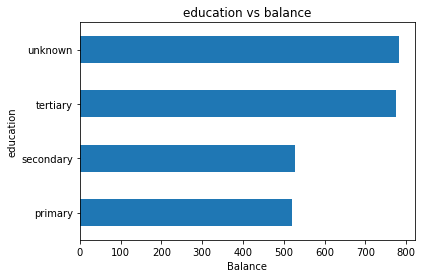

In [7]:
x = df.groupby('education')['balance'].median().plot(kind='barh')
x.set_xlabel('Balance')
x.set_title('education vs balance');

### from above grapgh tertiary level of education has higher balance 

## 4. Make a box plot for pdays. Do you see any outliers? 

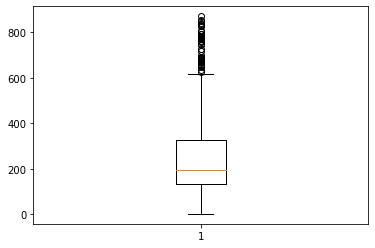

In [8]:
plt.boxplot(df['pdays']);

###  Their are outliers present in 'pdays'

## 5. Convert the response variable to a convenient form 

In [9]:
df.replace({ 'response':{'yes':1,'no':0} }, inplace=True)
df['response']

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: response, Length: 8257, dtype: int64

## 6. Make suitable plots for associations with numerical features and categorical features’ 

In [10]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


### a) job vs response  outcome

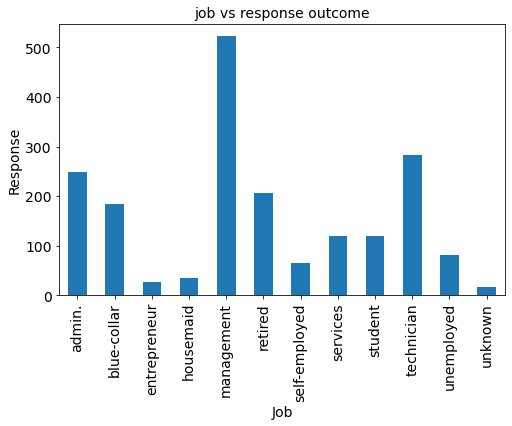

In [11]:
ax = df.groupby('job')['response'].sum().plot(kind='bar',figsize=(8,5), fontsize=14)
ax.set_xlabel('Job', fontsize=14)
ax.set_ylabel('Response',fontsize=14)
ax.set_title('job vs response outcome',fontsize=14);

###  From above 'Management'  'Technician' 'Retired' this top job type which give response to campaign  

### b)  marital status response to campaign 

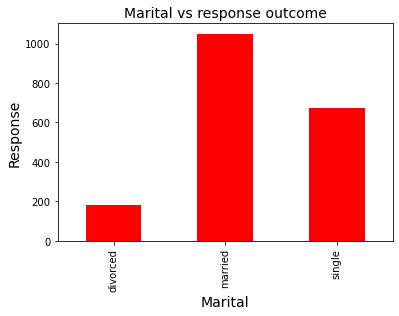

In [12]:
ax = df.groupby('marital')['response'].sum().plot(kind='bar',color='red')
ax.set_xlabel('Marital', fontsize=14)
ax.set_ylabel('Response',fontsize=14)
ax.set_title('Marital vs response outcome',fontsize=14);

### Married  is top one to respond  campaign 

### c) How education level response to campaign

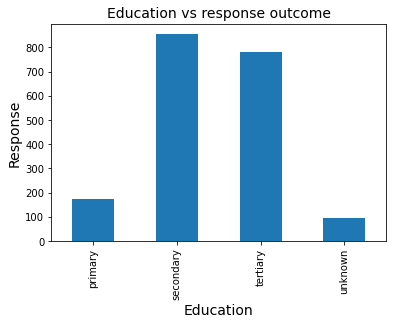

In [13]:
ax = df.groupby('education')['response'].sum().plot(kind='bar')
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Response',fontsize=14)
ax.set_title('Education vs response outcome',fontsize=14);

### we can see 'Secondary' gives huge response to campaign as compare to 'Tertiary' educational level  

### d) How many Targeted people response to campaign  

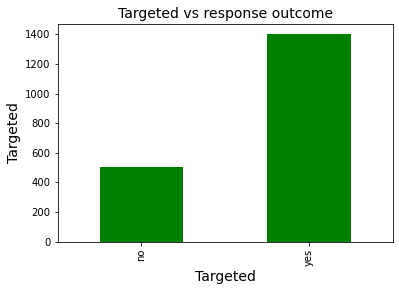

In [14]:
ax = df.groupby('targeted')['response'].sum().plot(kind='bar',color='g')
ax.set_xlabel('Targeted', fontsize=14)
ax.set_ylabel('Targeted',fontsize=14)
ax.set_title('Targeted vs response outcome',fontsize=14);

### we can see almost half of not targeted people response to campaign  

### e) Contact-wise who has more response to   campaign

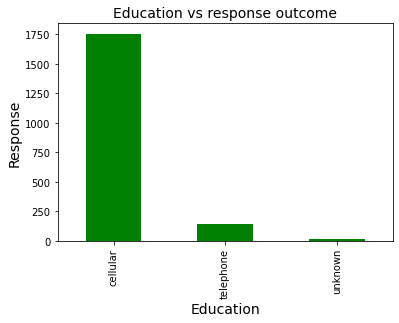

In [15]:
ax = df.groupby(['contact'])['response'].sum().plot(kind='bar',color='g')
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Response',fontsize=14)
ax.set_title('Education vs response outcome',fontsize=14);

## 7. Are the features about the previous campaign data useful?

### yes  

### a) people who have contacted  and their response to this (Response variable) campaign ?

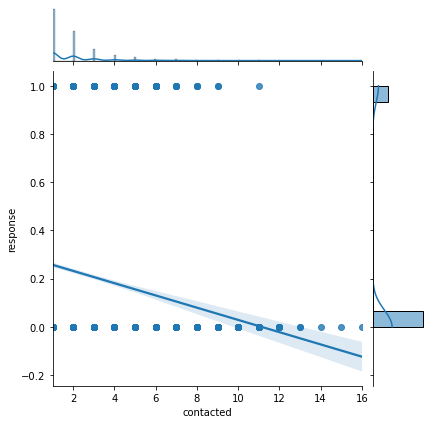

In [16]:
sns.jointplot(x='campaign',y='response', data=df,kind='reg')
plt.xlabel('contacted');

###  we can see negative corelation  means most of people we contacted doesnt response to this campaign

### b) people who respond to previous campaign also response to this campaign(response var) 

Text(0.5, 1.0, 'Response vs prev campaign response')

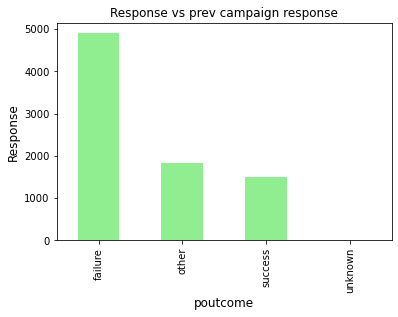

In [17]:
ax = df.groupby('poutcome')['response'].count().plot(kind='bar',color='lightgreen')
ax.set_xlabel('poutcome',fontsize=12)
ax.set_ylabel('Response',fontsize=12)
ax.set_title('Response vs prev campaign response',fontsize=12)

### Here people who haven't(failure) subscribe to previous campaign those most of people response to this campaign. 

## 8. Are pdays and poutcome associated with the target?
## If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

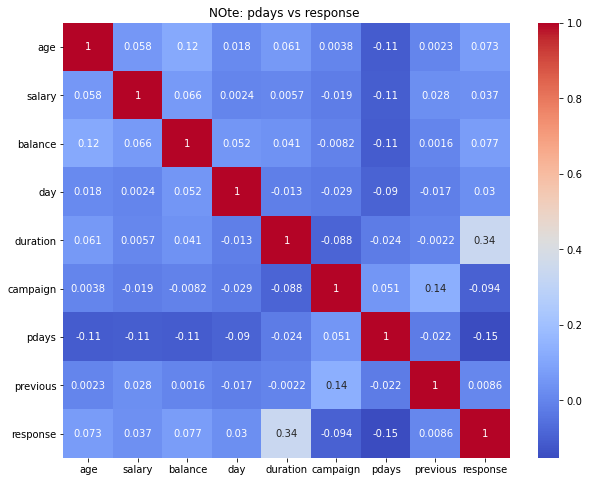

In [18]:
plt.figure( figsize=(10,8) )
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)
plt.title('NOte: pdays vs response ');

### from above pdays is not highly coorelated with reponse & from 7.b) even failure of previous campaign also highly response to target variable
###  Having Pdays = -1 we have dropped all such rows because -1 means dont know whether customer contacted or not to take decision it becomes difficult better to drop it. that we have done at starting  

In [19]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1


#  Modelling preparation   

In [20]:
# Warning libraries
import warnings
warnings.filterwarnings("ignore")

# encoding libraries
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

#splitting data libraries & metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## 1 separate dependent & independent variable  

In [21]:
X = df.iloc[:, :-1]   # independent variable 
X.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure


In [22]:
y = df.iloc[:, -1]   # dependent variable
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

## 2. Data pre-processing  : Encoding categorical data 

In [23]:
# convert all categorical col using LabelEncoder
le = LabelEncoder()
X.job = le.fit_transform(X.job)
X.marital = le.fit_transform(X.marital)
X.targeted = le.fit_transform(X.targeted)
X.education = le.fit_transform(X.education)
X.default = le.fit_transform(X.default)
X.housing = le.fit_transform(X.housing)
X.loan = le.fit_transform(X.loan)
X.month = le.fit_transform(X.month)
X.contact = le.fit_transform(X.contact)
X.poutcome = le.fit_transform(X.poutcome)

In [24]:
X.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0


## 3. Splitting data 

In [25]:
# 20 % Test data out of whole data 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [26]:
# converting it into again DataFrame because train-test fn makes data into numpy array for futher use
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Model 1: Logistic regression 

## 1. Training the Logistic Regression model on the Training set

In [40]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

###  predict & Accuracy , F1_score

In [41]:
y_pred = lr_classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy_Score: ',ac)

Accuracy_Score:  0.7693704600484261


## 2. RFE (Recursive Feature Elimination) model

In [42]:
rfe = RFE(estimator = lr_classifier, step=1 )  # Crreating Rfe 
rfe = rfe.fit(X_train, y_train)           # fit data on Rfe nodel

### 2.1 see the features selected by RFE by Rank-wise 

In [43]:
selected_rfe_features = pd.DataFrame({'Features':list(X_train.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking') 

# Here due to Scaling values,  features index no.are shown instead of coln name

,Features,Ranking
8,housing,1
14,campaign,1
10,contact,1
9,loan,1
6,default,1
17,poutcome,1
4,education,1
1,job,1
5,targeted,1
3,marital,2


### now transfrom training data by above selected features(rank=1) 

In [44]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

## 3. RFE model 

In [45]:
logistic_rfe_model = lr_classifier.fit(X_train_rfe, y_train)  

###  predict 

In [46]:
y_pred = logistic_rfe_model.predict(X_test_rfe)

## 4. Estimate the model performance using k fold cross validation

In [47]:
cross_val = cross_val_score(lr_classifier,X,y,cv=10, scoring='accuracy').mean()
print('cross_val ',cross_val)

cross_val  0.7679501063907843


## 5. What is the precision, recall, accuracy of your model? 

In [48]:
c = confusion_matrix(y_pred,y_test)
print('confusion_matrix:\n\n',c)

confusion_matrix:

 [[1190  244]
 [  65  153]]


In [39]:
print( classification_report(y_test,y_pred) )   # classification report

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1255
           1       0.70      0.39      0.50       397

    accuracy                           0.81      1652
   macro avg       0.77      0.67      0.69      1652
weighted avg       0.80      0.81      0.79      1652



In [49]:
ac = accuracy_score(y_test,y_pred)

print('\nAccuracy_Score: ',ac)
print('cross_val: ',cross_val)


Accuracy_Score:  0.812953995157385
cross_val:  0.7679501063907843


### Difference between Accuracy and CV is not much so model is stable 
### Accuracy before RFE is 76%   & after RFE is 81%  

## 6. Which features are the most important from your model? 

In [50]:
selected_rfe_features = pd.DataFrame({'Features':list(X_train.columns),
                                     'Ranking':rfe.ranking_}).sort_values(by='Ranking')
selected_rfe_features.head(10)

#from 2.1 features having rank 1 are imp from logistic regression moel:

,Features,Ranking
8,housing,1
14,campaign,1
10,contact,1
9,loan,1
6,default,1
17,poutcome,1
4,education,1
1,job,1
5,targeted,1
3,marital,2


# Model 2: Random Forest 
## Training the model 

In [51]:
classifier = RandomForestClassifier(n_estimators = 40, criterion = 'gini', max_depth = 5, random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=40, random_state=0)

In [53]:
# predicting result
y_pred1 = classifier.predict(X_test)

## 1. Estimate the model performance using k fold cross validation

In [54]:
cross_val = cross_val_score(classifier,X,y,cv=10, scoring='accuracy').mean()
print('cross_val ',cross_val)

cross_val  0.8160218651405092


## 2. What is the precision, recall, accuracy of your model? 

In [55]:
c = confusion_matrix(y_pred1,y_test)
print('confusion_matrix:\n\n',c)

confusion_matrix:

 [[1219  235]
 [  36  162]]


In [56]:
print( classification_report(y_test,y_pred1) )

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1255
           1       0.82      0.41      0.54       397

    accuracy                           0.84      1652
   macro avg       0.83      0.69      0.72      1652
weighted avg       0.83      0.84      0.81      1652



In [57]:
ac = accuracy_score(y_test,y_pred1)

print('\nAccuracy_Score: ',ac)
print('cross_val: ',cross_val)


Accuracy_Score:  0.835956416464891
cross_val:  0.8160218651405092


### Difference between Accuracy and CV is not much so model is stable 

## 3. RFE

In [58]:
# RFE model
rfe2 = RFE(estimator = classifier, step=1)
rfe2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, n_estimators=40,
                                     random_state=0))

#### TOP selected features are  Rank is 1 

In [59]:
selected_rfe2_features = pd.DataFrame({'Features':list(X_train.columns),
                                      'Ranking':rfe2.ranking_}).sort_values(by='Ranking')

selected_rfe2_features

,Features,Ranking
0,age,1
15,pdays,1
13,duration,1
12,month,1
11,day,1
7,balance,1
8,housing,1
1,job,1
17,poutcome,1
2,salary,2


### now transfrom training data by above selected features(rank=1) 

In [60]:
X_train_rfe2 = rfe2.transform(X_train)
X_test_rfe2 = rfe2.transform(X_test)

### Train classifier_rfe2 Model

In [61]:
classifier_rfe2_model = classifier.fit(X_train_rfe2, y_train) 

### predict classifier_rfe2 model 

In [62]:
y_pred2 = classifier_rfe2_model.predict(X_test_rfe2)

In [63]:
ac = accuracy_score(y_test,y_pred2)

print('\nAccuracy_Score: ',ac)


Accuracy_Score:  0.8389830508474576


###  from above accuracy Before RFE & After RFE gets slightly increase by point 

## 4.  Using the feature importance values from the Random Forest module, identify the most important features for the model

In [64]:
selected_rfe2_features.head(10)

,Features,Ranking
0,age,1
15,pdays,1
13,duration,1
12,month,1
11,day,1
7,balance,1
8,housing,1
1,job,1
17,poutcome,1
2,salary,2


#  Compare the performance of the Random Forest and the logistic model –

## 1. Evaluate both models on the test set 

In [65]:
y_pred_1 = logistic_rfe_model.predict(X_test_rfe)
y_pred_2 = classifier_rfe2_model.predict(X_test_rfe2)

ac1 = accuracy_score(y_test,y_pred_1)
ac2 = accuracy_score(y_test,y_pred_2)

print('Accuracy of logistic_rfe_model ',ac1)
print('\nAccuracy of classifier_rfe2_model', ac2)

Accuracy of logistic_rfe_model  0.812953995157385

Accuracy of classifier_rfe2_model 0.8389830508474576


## 2. Which metric did you choose and why?

### Here we have to perfom on test data so i have taken Accuracy as metrics but for whole data always Take CV as  metric  

## 3. Which model has better performance on the test set? 

### From above Accuracy of both logistic_rfe is slightly <  Random_forest_rfe model    

## 4. - Compare the feature importance from the different models – do they agree? Are the top features similar in both models? 

In [66]:
print( selected_rfe_features.head(10) )
print()
print(selected_rfe2_features.head(10) )

     Features  Ranking
8     housing        1
14   campaign        1
10    contact        1
9        loan        1
6     default        1
17   poutcome        1
4   education        1
1         job        1
5    targeted        1
3     marital        2

    Features  Ranking
0        age        1
15     pdays        1
13  duration        1
12     month        1
11       day        1
7    balance        1
8    housing        1
1        job        1
17  poutcome        1
2     salary        2


### In Logistic Model  Housing, campaign, loan, contact are imp features
### In Random_Forest Model has age, pdays, duration, month are imp features  
### Both model has different features_importance but poutcome & job  is imp common for both model 